In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import joblib
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('feature_data.csv')
print("Columns in feature_data.csv:")
print(df.columns)

Columns in feature_data.csv:
Index(['Reviewer Name', 'Rating', '00', '000', '00pm', '01', '02', '03', '04',
       '05',
       ...
       'yourselves', 'youtube', 'yr', 'yrs', 'zero', 'zone', '𝐒𝐮𝐩𝐩𝐨𝐫𝐭_',
       '𝒻𝓇𝑒𝑒', '𝕙𝕖𝕝𝕡', '𝕟𝕦𝕞𝕓𝕖𝕣'],
      dtype='object', length=5002)


Spliting the data into 80-20.

In [20]:
df['Fake_Review'] = df['Rating'].apply(lambda x: 1 if x <= 2 else 0)
X = df.drop(columns=['Reviewer Name', 'Fake_Review', 'Rating'])
y = df['Fake_Review']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 16844, Testing samples: 4211


Training the model.

In [22]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Evaluating the model.

In [23]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1290
           1       0.88      0.96      0.92      2921

    accuracy                           0.89      4211
   macro avg       0.89      0.84      0.86      4211
weighted avg       0.89      0.89      0.88      4211

Confusion Matrix:
[[ 920  370]
 [ 112 2809]]
Accuracy: 0.8855


Visulizing confusion matrix.

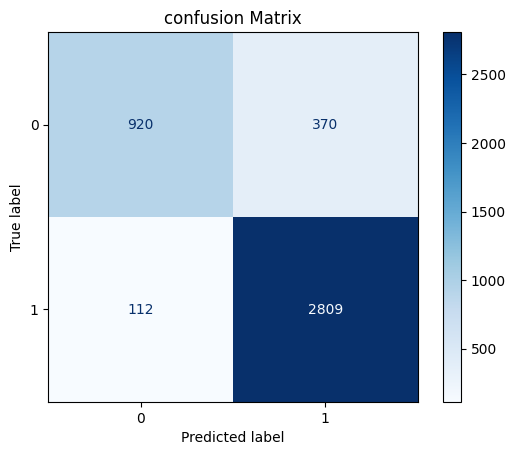

In [24]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title('confusion Matrix')
plt.show()

Finding cross Validation.

In [26]:
cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean():.4f}')

Cross-Validation Scores: [0.8515792  0.84231774 0.87983852 0.89764901 0.91522204]
Mean CV Score: 0.8773


Saving model for Future work.

In [27]:
joblib.dump(model,'pro_rev_ana_model.pkl')

['pro_rev_ana_model.pkl']